In [5]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np

In [14]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/titanic.csv")
display(titanic_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
# Drop unnecessary columns
df = titanic_df.drop(columns=['Fare', 'Cabin', 'Name', 'Parch', 'Ticket', 'SibSp', 'PassengerId'])

# Make gender numeric?
df['Sex'] = df['Sex'].replace(['male', 'female'], [0, 1])

# Fill missing embarked values and make numeric
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])

# Interpolate missing Age values and create bins
bins = [-np.infty, 20, 25, 29, 30, 40, np.infty]
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'] = pd.cut(x=df['Age'], bins=bins, labels=False)
display(df)
display(df['Age'].value_counts())

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,1,0
1,1,1,1,4,1
2,1,3,1,2,0
3,1,1,1,4,0
4,0,3,0,4,0
...,...,...,...,...,...
886,0,2,0,2,0
887,1,1,1,0,0
888,0,3,1,3,0
889,1,1,0,2,1


3    202
0    179
4    155
5    150
1    122
2     83
Name: Age, dtype: int64

In [42]:
y = df['Survived']
X = df.drop(columns=['Survived'])

display(y)
display(X)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

,Pclass,Sex,Age,Embarked
0,3,0,1,0
1,1,1,4,1
2,3,1,2,0
3,1,1,4,0
4,3,0,4,0
...,...,...,...,...
886,2,0,2,0
887,1,1,0,0
888,3,1,3,0
889,1,0,2,1


In [43]:
# You can read training data, randomly split into train/test sets of features (X) and labels (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# In general, a small learning rate and large number of estimators = more accurate XGBoost models
# Reference for tuning: https://www.kaggle.com/code/alexisbcook/xgboost?scriptVersionId=79127842&cellId=9
# Train our model with the XGBoost algorithm using our features (X_train) and labels (y_train)
#model = XGBClassifier(n_estimators=500, learning_rate=0.4)
#model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=50, eval_set=[(X_test, y_test)], verbose=False)

model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train.values.ravel())

# Evaluate model performance using the features from the test set (X_test)
y_pred = model.predict(X_test)

# Compare predictions (y_pred) with the labels in the test setx (y_test)
metrics = classification_report(y_test, y_pred, output_dict=True)
results = confusion_matrix(y_test, y_pred)
display(results)
#display(metrics)

#bins = [-np.infty, 20, 25, 29, 30, 40, np.infty]
#array([[102,  10],
#       [ 24,  43]], dtype=int64)



array([[103,   9],
       [ 25,  42]], dtype=int64)

0.8100558659217877

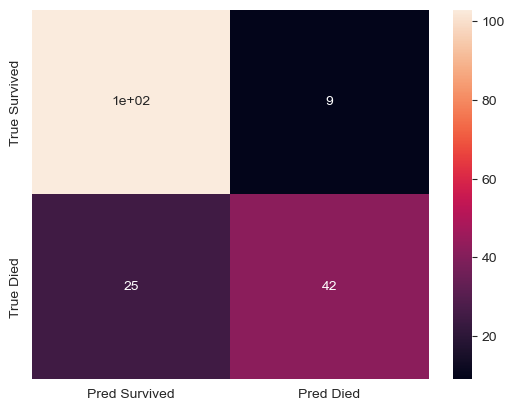

In [44]:
# Create the confusion matrix as a figure, we will later store it as a PNG image file
df_cm = pd.DataFrame(results, ['True Survived', 'True Died'],
                     ['Pred Survived', 'Pred Died'])
cm = sns.heatmap(df_cm, annot=True)
fig = cm.get_figure()
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

#display(predictions)
display(accuracy)